In [1]:
import pandas as pd
import numpy as np

civious_df = pd.read_csv('./data/Dataset.csv.txt', delimiter='\t')

#### **데이터 전처리**

1. puntuation 제거 (숫자로 비속어를 표현하는 경우도 있기때문에 숫자는 남겨둠)

civious_df['lable'].isnull()label null 인 것 처리(content에 같이 들어가 있었음)

하는 김에 label도 int로 바꿔줌

In [2]:
civious_df['lable'].isnull().sum()

25

In [3]:
for i in civious_df[civious_df['lable'].isnull()].index :
    textNlabel = civious_df.loc[i, 'content'].split('\t')
    civious_df.loc[i, 'content'] = textNlabel[0]
    civious_df.loc[i, 'lable'] = int(textNlabel[1])

In [4]:
civious_df['content'] = civious_df['content'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]","", regex=True)
# civious_df['content'] = civious_df['content'].str.replace("[:punct:]","", regex=True)

In [5]:
civious_df['lable'] = civious_df['lable'].apply(lambda x : int(x))

In [6]:
civious_df['lable'] = civious_df['lable'].replace([1,0],[0,1])

In [7]:
civious_df.head(5)

,content,lable
0,이종석 한효주 나오는 드라마 이후로 드라마 안봤다 2년전인가 좀 신선했었지 근데 이...,1
1,씨바알노무노무 술프노 오늘 저녁은 꽂등심이다ㅠㅜ,1
2,짱깨 꺼라ㅡ패쓰,1
3,그들의 사생활 고인이된 설리를 위해서라도 모두 조용하길 지금 누굴 탓한다고 무슨소...,0
4,아무리 법이 뭣같아도 무슨 자격으로 개인의 신상정보를 불특정 다수에게 공개하는지 도...,0


2. 중복 제거

In [8]:
civious_df.nunique()

content    9982
lable         2
dtype: int64

In [9]:
civious_df.drop_duplicates(subset=['content'], inplace=True, ignore_index=True)

In [10]:
civious_df.shape

(9982, 2)

3. puntuation 제거 후 빈 문자열이 된 데이터가 있는지 확인

In [11]:
civious_df['content'].replace('', np.nan, inplace=True)

In [12]:
civious_df.shape

(9982, 2)

In [13]:
print(civious_df['content'].isnull().sum())

0


content column에 빈 문자열은 없음!

#### **토큰화**

Okt

In [14]:
stopwords = []
stopwords_file = open('./data/korean_stopwords.txt', 'r', encoding='UTF8')
stopwords_lines = stopwords_file.readlines()
for line in stopwords_lines :
    stopwords.append(line.split('\t')[0])

In [15]:
import jpype #이거 안쓰면 에러남!!!!
from konlpy.tag import Okt

okt = Okt()

In [16]:
toknized_df = pd.DataFrame(columns=['text', 'label'])

In [17]:
for i in civious_df.index :
    sentence = civious_df.loc[i, 'content']
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    toknized_df.loc[i, 'text'] = temp_X

In [18]:
toknized_df['label'] = civious_df['lable']

In [19]:
toknized_df.head(5)

,text,label
0,"[이종석, 한효주, 나오다, 드라마, 이후, 로, 드라마, 보다, 2년, 전인가, ...",1
1,"[씨, 바알, 노무, 노무, 술프노, 오늘, 저녁, 은, 꽂다, 등심, 이다, ㅠㅜ]",1
2,"[짱깨, 끄다, ㅡ, 패쓰]",1
3,"[의, 사생활, 고인, 되다, 설리, 를, 위, 하다, 모두, 조용하다, 누굴, 탓...",0
4,"[아무리, 법, 뭣같아, 도, 무슨, 자격, 으로, 개인, 의, 신상, 정보, 를,...",0


코모란

In [20]:
from konlpy.tag import Komoran
komoran=Komoran()

In [21]:
komoran_df = pd.DataFrame(columns=['text', 'label'])

In [22]:
for i in civious_df.index :
    sentence = civious_df.loc[i, 'content']
    temp_X = komoran.morphs(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    komoran_df.loc[i, 'text'] = temp_X

In [23]:
komoran_df['label'] = civious_df['lable']

In [24]:
komoran_df.head(5)

,text,label
0,"[이종석, 한효주, 는, 드라마, 이후, 로, 드라마, 았, 다, 2년, 인가, 신...",1
1,"[씨, 바알, 노무, 노무, 술, 프, 노, 오늘, 저녁, 은, 꽂등심이다ㅠㅜ]",1
2,"[짱깨, 꺼라ㅡ패쓰]",1
3,"[의, 사생활, 고인, ㄴ, 설리, 를, 아서라도, 모두, 조용, 기, ㄹ, 누구,...",0
4,"[아무리, 법, 뭣, 아도, 무슨, 자격, 으로, 개인, 의, 신상, 정보, 를, ...",0


한나눔

In [25]:
from konlpy.tag import Hannanum
hannaum=Hannanum()
hannanum_df = pd.DataFrame(columns=['text', 'label'])

In [26]:
for i in civious_df.index :
    sentence = civious_df.loc[i, 'content']
    temp_X = hannaum.morphs(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    hannanum_df.loc[i, 'text'] = temp_X

In [27]:
hannanum_df['label'] = civious_df['lable']

In [28]:
hannanum_df.head(5)

,text,label
0,"[이종석, 한효주, 아, 는, 드라마, 이후, 로, 드라마, 안봤다, 2년, ㄴ가,...",1
1,"[씨바알노무노무, 술프노, 오늘, 저녁, 은, 꽂등심이다ㅠㅜ]",1
2,"[짱깨, 꺼라ㅡ패쓰]",1
3,"[의, 사생활, 고인이, ㄴ, 서, ㄹ, 리, 를, 어서, 라도, 모두, 조용하길,...",0
4,"[아무리, 법, 뭣같아도, 무슨, 자격, 으로, 개인, 의, 신상정보, 를, 불특정...",0


꼬꼬마

In [29]:
# from konlpy.tag import Kkma
# kkma=Kkma()
# kkma_df = pd.DataFrame(columns=['text', 'label'])

In [30]:
# for i in civious_df.index :
#     sentence = civious_df.loc[i, 'content']
#     temp_X = kkma.morphs(sentence) # 토큰화
#     temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
#     kkma_df.loc[i, 'text'] = temp_X

In [31]:
# kkma_df['label'] = civious_df['lable']

In [32]:
# kkma_df.head(5)

#### **인코딩**

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(toknized_df['text'])

In [34]:
# threshold = 3
# total_cnt = len(tokenizer.word_index) # 단어의 수
# rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
# total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
# rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# # 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
# for key, value in tokenizer.word_counts.items():
#     total_freq = total_freq + value

#     # 단어의 등장 빈도수가 threshold보다 작으면
#     if (value < threshold):
#         rare_cnt = rare_cnt + 1
#         rare_freq = rare_freq + value

# print('단어 집합(vocabulary)의 크기 :',total_cnt)
# print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
# print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
# print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

3회 미만으로 등장하는 단어가 8.9퍼센트를 차지한다.

In [35]:
# vocab_size = total_cnt - rare_cnt + 1
# print('단어 집합의 크기 :',vocab_size)

In [36]:
tokenizer = Tokenizer() 
tokenizer.fit_on_texts(toknized_df['text'])
toknized_df['encoding'] = tokenizer.texts_to_sequences(toknized_df['text'])

In [37]:
tokenizer = Tokenizer() 
tokenizer.fit_on_texts(komoran_df['text'])
komoran_df['encoding'] = tokenizer.texts_to_sequences(komoran_df['text'])

In [38]:
tokenizer = Tokenizer() 
tokenizer.fit_on_texts(hannanum_df['text'])
hannanum_df['encoding'] = tokenizer.texts_to_sequences(hannanum_df['text'])

In [39]:
# toknized_df.head(5)

문장을 구성하는 모든 단어가 희귀 단어여서 빈 encoding sequence를 생성하는 경우를 제거

In [40]:
# drop_index = [index for index, sentence in enumerate(toknized_df['encoding']) if len(sentence) < 1]

In [41]:
# len(drop_index)

In [42]:
# toknized_df.drop(index=drop_index, axis=0, inplace=True)
# # toknized_df = np.delete(toknized_df, drop_index, axis=0)
# toknized_df.reset_index(inplace=True, drop=True)

In [43]:
# toknized_df

#### **패딩**
샘플 길이 맞춰주는 과정

시퀀스 최대 길이 : 273
시퀀스 평균 길이 : 13.710579042276096


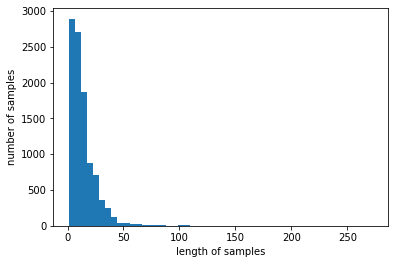

In [44]:
import matplotlib.pyplot as plt

print('시퀀스 최대 길이 :',max(len(l) for l in toknized_df['encoding']))
print('시퀀스 평균 길이 :',sum(map(len, toknized_df['encoding']))/len(toknized_df['encoding']))
plt.hist([len(s) for s in toknized_df['encoding']], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

최적의 시퀀스 길이(대부분의 텍스트가 내용이 잘리지 않도록 할 수 있는 최적의 max_len의 값)는?

In [45]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [46]:
max_len = 40
below_threshold_len(max_len, toknized_df['encoding'])

전체 샘플 중 길이가 40 이하인 샘플의 비율: 97.1348427168904


전체 데이터 중 약 97%의 샘플이 40 이하의 길이를 가짐. 모든 시퀀스 길이를 40으로 맞추기로 결정.

In [47]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

encoded_text = pad_sequences(toknized_df['encoding'], maxlen = max_len)

In [48]:
komoran_text = pad_sequences(komoran_df['encoding'], maxlen = max_len)
hannanum_text = pad_sequences(hannanum_df['encoding'], maxlen = max_len)

In [49]:
encoded_df = pd.DataFrame(data=encoded_text)
komoran_enc_df = pd.DataFrame(data=komoran_text)
hannanum_enc_df = pd.DataFrame(data=hannanum_text)

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(encoded_df, toknized_df['label'], random_state=42)

In [51]:
X_train_k, X_valid_k, y_train_k, y_valid_k = train_test_split(komoran_enc_df, toknized_df['label'], random_state=42)

In [52]:
X_train_h, X_valid_h, y_train_h, y_valid_h = train_test_split(hannanum_enc_df, toknized_df['label'], random_state=42)

#### **Machine learning**

1. Logistic regression

로지스틱 회귀는 실행할 때 regularation을 사용하기 때문에 그 전에 반드시 우리가 가진 데이터를 스케일링하는 작업이 필요하다.

In [55]:
from sklearn.preprocessing import StandardScaler
stand_scaler = StandardScaler()
X_train_lr = stand_scaler.fit_transform(X_train)
X_valid_lr = stand_scaler.transform(X_valid)

In [56]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train_lr, y_train)
print(lr_model.score(X_train_lr, y_train))

0.5537002404488378


In [57]:
print(lr_model.score(X_valid_lr, y_valid))

0.5288461538461539


In [58]:
def preprocess_text(new_sentence):
    new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
    new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    return pad_new

In [59]:
def lr_predict(new_sentence):
    processed_text = preprocess_text(new_sentence)
    processed_text = stand_scaler.transform(processed_text)
    score = float(lr_model.predict(processed_text)) # 예측
    if(score > 0.5):
        print("{:.2f}% 확률로 악의적인 글입니다.\n".format(score * 100))
    else:
        print("{:.2f}% 확률로 악의적인 글이 아닙니다.\n".format((1 - score) * 100))

In [60]:
lr_predict('이 영화 핵노잼 ㅠㅠ')

100.00% 확률로 악의적인 글이 아닙니다.



In [61]:
lr_predict('개소리야 니가 빨갱이를 옹호하고 드루킹을 ㅇㅇ짓이라고 말못해서 삐진거야')

100.00% 확률로 악의적인 글이 아닙니다.



2. Decision Tree Classifier

In [62]:
# from sklearn.model_selection import cross_val_score
# from sklearn.tree import DecisionTreeClassifier
# clf = DecisionTreeClassifier(random_state=0)
# cross_val_score(clf, iris.data, iris.target, cv=10)

In [63]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [64]:
print(dt_model.score(X_train, y_train))

1.0


In [65]:
print(dt_model.score(X_valid, y_valid))

0.5216346153846154


3. Random Forest Model

In [66]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_features=10, max_depth=10, random_state = 0)
rf_model.fit(X_train_o, y_train_o)

RandomForestClassifier(max_depth=10, max_features=10, random_state=0)

In [67]:
print(rf_model.score(X_train_o, y_train_o))
print(rf_model.score(X_valid_o, y_valid_o))

0.8211327811915575
0.5588942307692307


In [68]:
rf_model = RandomForestClassifier(max_features=10, max_depth=10, random_state = 0)
rf_model.fit(X_train_k, y_train_k)

RandomForestClassifier(max_depth=10, max_features=10, random_state=0)

In [ ]:
print(rf_model.score(X_train_k, y_train_k))
print(rf_model.score(X_valid_k, y_valid_k))

In [ ]:
rf_model = RandomForestClassifier(max_features=10, max_depth=10, random_state = 0)
rf_model.fit(X_train_h, y_train_h)
print(rf_model.score(X_train_h, y_train_h))
print(rf_model.score(X_valid_h, y_valid_h))

아마.. 과적합?

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(random_state = 0)

param_list = {"n_estimators": list(range(10, 100, 10)),
              "max_depth": list(range(3, 30, 1)),
              "max_features": list(range(3, 30, 1)),
              "min_samples_split": list(range(3, 30, 1))}

rf_random_search = RandomizedSearchCV(
        estimator=rf_model,
        param_distributions = param_list,
        n_iter = 20,
        cv = 5,
        scoring = 'accuracy')

rf_random_search.fit(X_train_o, y_train_o)

In [ ]:
rf_random_search.best_params_

In [ ]:
print(rf_random_search.score(X_train_o, y_train_o))
print(rf_random_search.score(X_valid_o, y_valid_o))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(random_state = 0)

param_list = {"n_estimators": list(range(10, 100, 10)),
              "max_depth": list(range(3, 30, 1)),
              "max_features": list(range(3, 30, 1)),
              "min_samples_split": list(range(3, 30, 1))}

rf_random_search = RandomizedSearchCV(
        estimator=rf_model,
        param_distributions = param_list,
        n_iter = 20,
        cv = 5,
        scoring = 'accuracy')

rf_random_search.fit(X_train_k, y_train_k)

In [ ]:
rf_random_search.best_params_

In [ ]:
print(rf_random_search.score(X_train_k, y_train_k))
print(rf_random_search.score(X_valid_k, y_valid_k))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(random_state = 0)

param_list = {"n_estimators": list(range(10, 100, 10)),
              "max_depth": list(range(3, 30, 1)),
              "max_features": list(range(3, 30, 1)),
              "min_samples_split": list(range(3, 30, 1))}

rf_random_search = RandomizedSearchCV(
        estimator=rf_model,
        param_distributions = param_list,
        n_iter = 20,
        cv = 5,
        scoring = 'accuracy')

rf_random_search.fit(X_train_h, y_train_h)

In [ ]:
rf_random_search.best_params_

In [ ]:
print(rf_random_search.score(X_train_h, y_train_h))
print(rf_random_search.score(X_valid_h, y_valid_h))

In [69]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier(n_estimators=100, random_state=0)
ada_boost.fit(X_train_o, y_train_o)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [70]:
print(ada_boost.score(X_train_o, y_train_o))
print(ada_boost.score(X_valid_o, y_valid_o))

0.6379909163772375
0.5721153846153846


In [71]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0) # 기본값: max_depth=3, learning_rate=0.1
gbc.fit(X_train_o, y_train_o)

GradientBoostingClassifier(random_state=0)

In [72]:
print(gbc.score(X_train_o, y_train_o))
print(gbc.score(X_valid_o, y_valid_o))

0.6843441090034732
0.59375


In [73]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(random_state=0)
xgbc.fit(X_train_o, y_train_o)

c:\users\yumin\anaconda3\envs\proj1_vic\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:03:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [74]:
print(xgbc.score(X_train_o, y_train_o))
print(xgbc.score(X_valid_o, y_valid_o))

0.934410900347315
0.6073717948717948


LSA

In [75]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

# SVD를 사용한 차원 축소
from sklearn.decomposition import TruncatedSVD

vect = TfidfVectorizer(stop_words=stopwords
                       , ngram_range=(1,2)
                       , min_df=2
                       , max_df=0.7
                       , token_pattern='[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]' # 영문자만 사용
                       , max_features=1000
                      )

svd = TruncatedSVD(algorithm='randomized'
                   , n_iter=5
                   , random_state=2)

rfc = RandomForestClassifier(n_estimators=500, random_state=2)

In [76]:
from sklearn.pipeline import Pipeline
params = {
    # 100~500 사이의 정수 크기로 차원을 줄입니다
#     'svd__n_components': stats.randint(100, 500)
    'svd__n_components': stats.randint(2, 3) # 문서의 차원을 2로 고정
    
}

pipe = Pipeline([
    ('svd', svd)
    , ('clf', rfc)
])

In [77]:
random_search = RandomizedSearchCV(pipe, params, cv=3, n_iter=5, n_jobs=-1, verbose=1)
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('svd',
                                              TruncatedSVD(random_state=2)),
                                             ('clf',
                                              RandomForestClassifier(n_estimators=500,
                                                                     random_state=2))]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'svd__n_components': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000200C9ED2A90>},
                   verbose=1)

In [78]:
random_search.best_score_

0.5065449809876162